## Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
pd.set_option('display.max_columns', 100) # shows all the columns

In [3]:
# Loading all the training datasets 

Train_Beneficiary = pd.read_csv('Train_Beneficiary.csv')
Train_Inpatient = pd.read_csv('Train_Inpatient.csv')
Train_Outpatient = pd.read_csv('Train_Outpatient.csv')
Fraud_label = pd.read_csv('Train_Fraud.csv')

In [4]:
Train_Beneficiary = Train_Beneficiary.drop(['DOD'], axis = 1)
Train_Inpatient = Train_Inpatient.drop(['ClmProcedureCode_6'], axis = 1) # dropping because 100% data as NAs
Train_Outpatient = Train_Outpatient.drop(['ClmProcedureCode_6'], axis = 1) # dropping because 100% data as NAs

In [5]:
Train_Beneficiary.isnull().sum() # row = 138556

BeneID                             0
DOB                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
dtype: int64

In [6]:
Train_Inpatient.isnull().sum() # row = 40474

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
dtype: int64

In [7]:
# Fill 0 for NA type data points

Train_Inpatient[['DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']] = Train_Inpatient[[\
                                                                                             'DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']].fillna(0)

Train_Outpatient[['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']] = Train_Outpatient[[\
                                                                                              'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']].fillna(0)

# Filling None for no Doctors

Train_Inpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = \
Train_Inpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].fillna('None')

Train_Outpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = \
Train_Outpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].fillna('None')

In [8]:
Merged_Inpatient = pd.merge(Train_Beneficiary, Train_Inpatient, how = 'inner', on = 'BeneID')
Merged_Inpatient = pd.merge(Merged_Inpatient, Fraud_label, how = 'inner', on = 'Provider')

Merged_Outpatient = pd.merge(Train_Beneficiary, Train_Outpatient, how = 'inner', on = 'BeneID')
Merged_Outpatient = pd.merge(Merged_Outpatient, Fraud_label, how = 'inner', on = 'Provider')

In [9]:
replace_two = ['Gender', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', \
                      'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', \
                      'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

Merged_Inpatient.RenalDiseaseIndicator = Merged_Inpatient.RenalDiseaseIndicator.replace('Y', 1)
Merged_Inpatient[replace_two] = Merged_Inpatient[replace_two].replace(2, 0)

Merged_Outpatient.RenalDiseaseIndicator = Merged_Outpatient.RenalDiseaseIndicator.replace('Y', 1)
Merged_Outpatient[replace_two] = Merged_Outpatient[replace_two].replace(2, 0)


Merged_Inpatient['PotentialFraud'] = Merged_Inpatient['PotentialFraud'].replace(['Yes', 'No'], [1, 0]) 
Merged_Outpatient['PotentialFraud'] = Merged_Outpatient['PotentialFraud'].replace(['Yes', 'No'], [1, 0]) 

In [10]:
# Calculating Age of all the patients with respect to 2009
Merged_Inpatient['Age'] = int(2009) - Merged_Inpatient.DOB.apply(lambda x: x.split('-')[0]).astype('int')
Merged_Outpatient['Age'] = int(2009) - Merged_Outpatient.DOB.apply(lambda x: x.split('-')[0]).astype('int')

Merged_Inpatient = Merged_Inpatient.drop('DOB', axis = 1)
Merged_Outpatient = Merged_Outpatient.drop('DOB', axis = 1)

In [11]:
# printing all the unique values to make sure the columns are good to go (Inpatient)
for column in replace_two:
    print(column, Merged_Inpatient[column].unique())

print(' * ' * 20)

# printing all the unique values to make sure the columns are good to go (Outpatient)
for column in replace_two:
    print(column, Merged_Outpatient[column].unique())

Gender [1 0]
ChronicCond_Alzheimer [1 0]
ChronicCond_Heartfailure [0 1]
ChronicCond_KidneyDisease [1 0]
ChronicCond_Cancer [0 1]
ChronicCond_ObstrPulmonary [0 1]
ChronicCond_Depression [1 0]
ChronicCond_Diabetes [1 0]
ChronicCond_IschemicHeart [1 0]
ChronicCond_Osteoporasis [0 1]
ChronicCond_rheumatoidarthritis [1 0]
ChronicCond_stroke [1 0]
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
Gender [0 1]
ChronicCond_Alzheimer [0 1]
ChronicCond_Heartfailure [0 1]
ChronicCond_KidneyDisease [0 1]
ChronicCond_Cancer [0 1]
ChronicCond_ObstrPulmonary [0 1]
ChronicCond_Depression [0 1]
ChronicCond_Diabetes [0 1]
ChronicCond_IschemicHeart [0 1]
ChronicCond_Osteoporasis [0 1]
ChronicCond_rheumatoidarthritis [0 1]
ChronicCond_stroke [0 1]


In [12]:
#Merged_Inpatient['DOB'] = pd.to_datetime(Merged_Inpatient['DOB'])
Merged_Inpatient['ClaimStartDt'] = pd.to_datetime(Merged_Inpatient['ClaimStartDt'])
Merged_Inpatient['ClaimEndDt'] = pd.to_datetime(Merged_Inpatient['ClaimEndDt'])
Merged_Inpatient['AdmissionDt'] = pd.to_datetime(Merged_Inpatient['AdmissionDt'])
Merged_Inpatient['DischargeDt'] = pd.to_datetime(Merged_Inpatient['DischargeDt'])


#Merged_Outpatient['DOB'] = pd.to_datetime(Merged_Outpatient['DOB'])
Merged_Outpatient['ClaimStartDt'] = pd.to_datetime(Merged_Outpatient['ClaimStartDt'])
Merged_Outpatient['ClaimEndDt'] = pd.to_datetime(Merged_Outpatient['ClaimEndDt'])

In [13]:
Merged_Inpatient['Type'] = 'Inpatient'
Merged_Outpatient['Type'] = 'Outpatient'

Merged_InOut = pd.concat([Merged_Inpatient, Merged_Outpatient], axis = 0)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [14]:
# column for per patients hospital stay count
Merged_InOut['Hospital_Stay'] = (Merged_InOut['DischargeDt'] - Merged_InOut['AdmissionDt']).dt.days
Merged_InOut['Claim_Length'] = (Merged_InOut['ClaimEndDt'] - Merged_InOut['ClaimStartDt']).dt.days

In [15]:
Merged_InOut = Merged_InOut.drop(['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt'], axis = 1)

In [16]:
Merged_InOut = Merged_InOut.fillna(0)

In [17]:
Merged_InOut.isnull().sum()

Age                                0
AttendingPhysician                 0
BeneID                             0
ChronicCond_Alzheimer              0
ChronicCond_Cancer                 0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_Heartfailure           0
ChronicCond_IschemicHeart          0
ChronicCond_KidneyDisease          0
ChronicCond_ObstrPulmonary         0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
ClaimID                            0
ClmAdmitDiagnosisCode              0
ClmDiagnosisCode_1                 0
ClmDiagnosisCode_10                0
ClmDiagnosisCode_2                 0
ClmDiagnosisCode_3                 0
ClmDiagnosisCode_4                 0
ClmDiagnosisCode_5                 0
ClmDiagnosisCode_6                 0
ClmDiagnosisCode_7                 0
ClmDiagnosisCode_8                 0
ClmDiagnosisCode_9                 0
ClmProcedureCode_1                 0
C

In [18]:
Merged_InOut.dtypes

Age                                  int32
AttendingPhysician                  object
BeneID                              object
ChronicCond_Alzheimer                int64
ChronicCond_Cancer                   int64
ChronicCond_Depression               int64
ChronicCond_Diabetes                 int64
ChronicCond_Heartfailure             int64
ChronicCond_IschemicHeart            int64
ChronicCond_KidneyDisease            int64
ChronicCond_ObstrPulmonary           int64
ChronicCond_Osteoporasis             int64
ChronicCond_rheumatoidarthritis      int64
ChronicCond_stroke                   int64
ClaimID                             object
ClmAdmitDiagnosisCode               object
ClmDiagnosisCode_1                  object
ClmDiagnosisCode_10                 object
ClmDiagnosisCode_2                  object
ClmDiagnosisCode_3                  object
ClmDiagnosisCode_4                  object
ClmDiagnosisCode_5                  object
ClmDiagnosisCode_6                  object
ClmDiagnosi

In [19]:
Merged_fraud = Merged_InOut.loc[Merged_InOut.PotentialFraud == 1]

In [20]:
Merged_Nfraud = Merged_InOut.loc[Merged_InOut.PotentialFraud == 0]

In [21]:
Merged_fraud.head()

,Age,AttendingPhysician,BeneID,ChronicCond_Alzheimer,ChronicCond_Cancer,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_Heartfailure,ChronicCond_IschemicHeart,ChronicCond_KidneyDisease,ChronicCond_ObstrPulmonary,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,ClaimID,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,County,DeductibleAmtPaid,DiagnosisGroupCode,Gender,IPAnnualDeductibleAmt,IPAnnualReimbursementAmt,InscClaimAmtReimbursed,NoOfMonths_PartACov,NoOfMonths_PartBCov,OPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OperatingPhysician,OtherPhysician,PotentialFraud,Provider,Race,RenalDiseaseIndicator,State,Type,Hospital_Stay,Claim_Length
0,66,PHY390922,BENE11001,1,0,1,1,0,1,1,0,0,1,1,CLM46614,7866,1970,0,4019,5853,7843,2768,71590,2724,19889,5849,0.0,0.0,0.0,0.0,0.0,230,1068.0,201,1,3204,36000,26000,12,12,70,60,None,None,1,PRV55912,1,0,39,Inpatient,6.0,6
1,96,PHY349293,BENE17521,1,0,0,0,1,1,1,1,0,0,0,CLM34721,45340,4240,0,2639,2948,40390,45821,28489,5854,2753,E9305,7769.0,5849.0,0.0,0.0,0.0,230,1068.0,987,0,1068,19000,19000,12,12,20,100,PHY370861,PHY363291,1,PRV55912,1,0,39,Inpatient,12.0,12
2,87,PHY334706,BENE21718,0,0,0,0,0,1,0,0,1,0,0,CLM72336,V5789,V5789,0,4168,73313,7812,7993,78830,72273,43812,4019,9338.0,0.0,0.0,0.0,0.0,600,1068.0,941,1,1068,17000,17000,12,12,540,1050,PHY334706,None,1,PRV55912,1,0,39,Inpatient,18.0,18
3,79,PHY390614,BENE22934,0,0,0,1,1,1,0,1,1,1,0,CLM73394,71946,71535,0,71960,4019,V1202,4240,2449,2768,0,0,8154.0,0.0,0.0,0.0,0.0,280,1068.0,506,0,2136,27000,13000,12,12,160,450,PHY323689,PHY363291,1,PRV55912,1,0,39,Inpatient,4.0,4
4,84,PHY380413,BENE24402,1,1,0,0,0,1,0,0,0,0,0,CLM32911,1748,2330,0,0,0,0,0,0,0,0,0,8543.0,0.0,0.0,0.0,0.0,510,1068.0,593,0,1068,3000,3000,12,12,740,8900,PHY432598,None,1,PRV55912,2,0,39,Inpatient,4.0,4


In [22]:
Merged_Nfraud.head()

,Age,AttendingPhysician,BeneID,ChronicCond_Alzheimer,ChronicCond_Cancer,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_Heartfailure,ChronicCond_IschemicHeart,ChronicCond_KidneyDisease,ChronicCond_ObstrPulmonary,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,ClaimID,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,County,DeductibleAmtPaid,DiagnosisGroupCode,Gender,IPAnnualDeductibleAmt,IPAnnualReimbursementAmt,InscClaimAmtReimbursed,NoOfMonths_PartACov,NoOfMonths_PartBCov,OPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OperatingPhysician,OtherPhysician,PotentialFraud,Provider,Race,RenalDiseaseIndicator,State,Type,Hospital_Stay,Claim_Length
60,66,PHY318495,BENE11001,1,0,1,1,0,1,1,0,0,1,1,CLM66048,6186,6186,0,2948,56400,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,230,1068.0,750,1,3204,36000,5000,12,12,70,60,PHY318495,None,0,PRV55907,1,0,39,Inpatient,2.0,2
61,82,PHY369014,BENE11183,0,0,0,1,1,1,0,0,0,0,0,CLM57950,78605,56089,0,0389,V433,82021,11284,E9478,4271,261,0,8345.0,0.0,0.0,0.0,0.0,60,1068.0,986,1,2136,31240,26000,12,12,630,4190,PHY391371,None,0,PRV55907,1,0,36,Inpatient,2.0,2
62,66,PHY328529,BENE11352,0,0,0,1,1,1,1,0,0,1,0,CLM62859,7802,25080,0,2767,4019,40390,V4365,V1582,4439,53081,5849,0.0,0.0,0.0,0.0,0.0,240,1068.0,643,0,1068,4000,4000,12,12,180,1030,None,PHY391371,0,PRV55907,1,0,51,Inpatient,5.0,5
63,85,PHY391371,BENE11536,0,0,1,1,1,1,1,0,1,0,1,CLM62860,7802,27651,0,42789,72887,5859,2724,95919,7295,56039,5641,0.0,0.0,0.0,0.0,0.0,70,1068.0,620,1,1068,3000,3000,12,12,160,1580,None,None,0,PRV55907,1,1,39,Inpatient,3.0,3
64,78,PHY376827,BENE18988,0,0,0,0,1,0,0,0,0,1,0,CLM80640,4280,4280,0,V4502,V1254,27801,2859,5939,2724,79902,2449,0.0,0.0,0.0,0.0,0.0,420,1068.0,256,0,1068,6000,6000,12,12,150,1300,None,None,0,PRV55907,1,0,36,Inpatient,3.0,3


In [23]:
provider_fraud = pd.DataFrame(Merged_fraud.Provider.unique(), columns = ['Provider'])
provider_Nfraud = pd.DataFrame(Merged_Nfraud.Provider.unique(), columns = ['Provider'])

In [580]:
provider_fraud = pd.DataFrame(Merged_fraud.Provider.unique(), columns = ['Provider'])

In [424]:
provider_Nfraud = pd.DataFrame(Merged_Nfraud.Provider.unique(), columns = ['Provider'])

In [581]:
provider_fraud.shape

(506, 1)

In [619]:
provider_fraud

,Provider,CDC_4019,CDC_25000,CDC_2724,CDC_42731,CDC_4280,CDC_41401,CDC_53081,CDC_2449,CDC_5990,CDC_496
0,PRV55912,9,7,8,8,7,4,5,5,5,4
1,PRV54986,9,9,9,9,7,9,9,8,8,10
2,PRV51148,8,8,8,7,7,7,6,5,4,6
3,PRV55215,10,9,10,10,10,10,10,10,10,10
4,PRV55193,5,6,5,4,7,6,6,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...
501,PRV57282,4,2,2,1,0,0,1,0,0,2
502,PRV54540,3,1,0,0,0,0,0,1,0,0
503,PRV56523,3,0,1,0,2,1,0,1,1,1
504,PRV55895,0,0,1,0,0,0,0,0,0,0


In [25]:
provider_Nfraud.shape

(4904, 1)

In [417]:
Claim_Count_f = Merged_fraud.groupby('Provider').size().to_frame().rename(columns = {0: "Claim_Count"}).reset_index()
Claim_Count_n = Merged_Nfraud.groupby('Provider').size().to_frame().rename(columns = {0: "Claim_Count"}).reset_index()

In [418]:
Claim_Count_f.shape

(506, 2)

In [419]:
Claim_Count_n.shape

(4904, 2)

In [29]:
provider_fraud = provider_fraud.merge(right = Claim_Count_f, on = 'Provider')
provider_Nfraud = provider_Nfraud.merge(right = Claim_Count_n, on = 'Provider')

In [420]:
provider_Nfraud = provider_Nfraud.merge(right = Claim_Count_n, on = 'Provider')

In [30]:
provider_fraud.shape

(506, 2)

In [421]:
provider_Nfraud.shape

(0, 24)

In [32]:
Merged_fraud.head()

,Age,AttendingPhysician,BeneID,ChronicCond_Alzheimer,ChronicCond_Cancer,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_Heartfailure,ChronicCond_IschemicHeart,ChronicCond_KidneyDisease,ChronicCond_ObstrPulmonary,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,ClaimID,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,County,DeductibleAmtPaid,DiagnosisGroupCode,Gender,IPAnnualDeductibleAmt,IPAnnualReimbursementAmt,InscClaimAmtReimbursed,NoOfMonths_PartACov,NoOfMonths_PartBCov,OPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OperatingPhysician,OtherPhysician,PotentialFraud,Provider,Race,RenalDiseaseIndicator,State,Type,Hospital_Stay,Claim_Length
0,66,PHY390922,BENE11001,1,0,1,1,0,1,1,0,0,1,1,CLM46614,7866,1970,0,4019,5853,7843,2768,71590,2724,19889,5849,0.0,0.0,0.0,0.0,0.0,230,1068.0,201,1,3204,36000,26000,12,12,70,60,None,None,1,PRV55912,1,0,39,Inpatient,6.0,6
1,96,PHY349293,BENE17521,1,0,0,0,1,1,1,1,0,0,0,CLM34721,45340,4240,0,2639,2948,40390,45821,28489,5854,2753,E9305,7769.0,5849.0,0.0,0.0,0.0,230,1068.0,987,0,1068,19000,19000,12,12,20,100,PHY370861,PHY363291,1,PRV55912,1,0,39,Inpatient,12.0,12
2,87,PHY334706,BENE21718,0,0,0,0,0,1,0,0,1,0,0,CLM72336,V5789,V5789,0,4168,73313,7812,7993,78830,72273,43812,4019,9338.0,0.0,0.0,0.0,0.0,600,1068.0,941,1,1068,17000,17000,12,12,540,1050,PHY334706,None,1,PRV55912,1,0,39,Inpatient,18.0,18
3,79,PHY390614,BENE22934,0,0,0,1,1,1,0,1,1,1,0,CLM73394,71946,71535,0,71960,4019,V1202,4240,2449,2768,0,0,8154.0,0.0,0.0,0.0,0.0,280,1068.0,506,0,2136,27000,13000,12,12,160,450,PHY323689,PHY363291,1,PRV55912,1,0,39,Inpatient,4.0,4
4,84,PHY380413,BENE24402,1,1,0,0,0,1,0,0,0,0,0,CLM32911,1748,2330,0,0,0,0,0,0,0,0,0,8543.0,0.0,0.0,0.0,0.0,510,1068.0,593,0,1068,3000,3000,12,12,740,8900,PHY432598,None,1,PRV55912,2,0,39,Inpatient,4.0,4


## Count of Diagnosis Code per Fraudulent Provider

In [56]:
FClm_D_1 = Merged_fraud[Merged_fraud['ClmDiagnosisCode_1']!=0]
FClm_D_2 = Merged_fraud[Merged_fraud['ClmDiagnosisCode_2']!=0]
FClm_D_3 = Merged_fraud[Merged_fraud['ClmDiagnosisCode_3']!=0]
FClm_D_4 = Merged_fraud[Merged_fraud['ClmDiagnosisCode_4']!=0]
FClm_D_5 = Merged_fraud[Merged_fraud['ClmDiagnosisCode_5']!=0]
FClm_D_6 = Merged_fraud[Merged_fraud['ClmDiagnosisCode_6']!=0]
FClm_D_7 = Merged_fraud[Merged_fraud['ClmDiagnosisCode_7']!=0]
FClm_D_8 = Merged_fraud[Merged_fraud['ClmDiagnosisCode_8']!=0]
FClm_D_9 = Merged_fraud[Merged_fraud['ClmDiagnosisCode_9']!=0]
FClm_D_10 = Merged_fraud[Merged_fraud['ClmDiagnosisCode_10']!=0]

In [75]:
ClmDiagnosisCode_1_count =FClm_D_1.groupby('Provider')['ClmDiagnosisCode_1'].count().reset_index().rename(columns={'ClmDiagnosisCode_1':'ClmDiagnosisCode_1_count'})

In [120]:
Merged_fraud = Merged_fraud.merge(ClmDiagnosisCode_10_count, how='left')

In [82]:
ClmDiagnosisCode_2_count =FClm_D_2.groupby('Provider')['ClmDiagnosisCode_2'].count().reset_index().rename(columns={'ClmDiagnosisCode_2':'ClmDiagnosisCode_2_count'})

In [84]:
ClmDiagnosisCode_3_count =FClm_D_3.groupby('Provider')['ClmDiagnosisCode_3'].count().reset_index().rename(columns={'ClmDiagnosisCode_3':'ClmDiagnosisCode_3_count'})

In [102]:
ClmDiagnosisCode_4_count =FClm_D_4.groupby('Provider')['ClmDiagnosisCode_4'].count().reset_index().rename(columns={'ClmDiagnosisCode_4':'ClmDiagnosisCode_4_count'})

In [107]:
ClmDiagnosisCode_5_count =FClm_D_5.groupby('Provider')['ClmDiagnosisCode_5'].count().reset_index().rename(columns={'ClmDiagnosisCode_5':'ClmDiagnosisCode_5_count'})

In [110]:
ClmDiagnosisCode_6_count =FClm_D_6.groupby('Provider')['ClmDiagnosisCode_6'].count().reset_index().rename(columns={'ClmDiagnosisCode_6':'ClmDiagnosisCode_6_count'})

In [113]:
ClmDiagnosisCode_7_count =FClm_D_7.groupby('Provider')['ClmDiagnosisCode_7'].count().reset_index().rename(columns={'ClmDiagnosisCode_7':'ClmDiagnosisCode_7_count'})

In [115]:
ClmDiagnosisCode_8_count =FClm_D_8.groupby('Provider')['ClmDiagnosisCode_8'].count().reset_index().rename(columns={'ClmDiagnosisCode_8':'ClmDiagnosisCode_8_count'})

In [117]:
ClmDiagnosisCode_9_count =FClm_D_9.groupby('Provider')['ClmDiagnosisCode_9'].count().reset_index().rename(columns={'ClmDiagnosisCode_9':'ClmDiagnosisCode_9_count'})

In [119]:
ClmDiagnosisCode_10_count =FClm_D_10.groupby('Provider')['ClmDiagnosisCode_10'].count().reset_index().rename(columns={'ClmDiagnosisCode_10':'ClmDiagnosisCode_10_count'})

## Count of Diagnosis Code per non-Fraudulent Provider

In [123]:
Clm_D_1 = Merged_Nfraud[Merged_Nfraud['ClmDiagnosisCode_1']!=0]
Clm_D_2 = Merged_Nfraud[Merged_Nfraud['ClmDiagnosisCode_2']!=0]
Clm_D_3 = Merged_Nfraud[Merged_Nfraud['ClmDiagnosisCode_3']!=0]
Clm_D_4 = Merged_Nfraud[Merged_Nfraud['ClmDiagnosisCode_4']!=0]
Clm_D_5 = Merged_Nfraud[Merged_Nfraud['ClmDiagnosisCode_5']!=0]
Clm_D_6 = Merged_Nfraud[Merged_Nfraud['ClmDiagnosisCode_6']!=0]
Clm_D_7 = Merged_Nfraud[Merged_Nfraud['ClmDiagnosisCode_7']!=0]
Clm_D_8 = Merged_Nfraud[Merged_Nfraud['ClmDiagnosisCode_8']!=0]
Clm_D_9 = Merged_Nfraud[Merged_Nfraud['ClmDiagnosisCode_9']!=0]
Clm_D_10 = Merged_Nfraud[Merged_Nfraud['ClmDiagnosisCode_10']!=0]

In [124]:
ClmDiagnosisCode_1_count =Clm_D_1.groupby('Provider')['ClmDiagnosisCode_1'].count().reset_index().rename(columns={'ClmDiagnosisCode_1':'ClmDiagnosisCode_1_count'})

In [145]:
Merged_Nfraud = Merged_Nfraud.merge(ClmDiagnosisCode_10_count, how='left')

In [127]:
ClmDiagnosisCode_2_count =Clm_D_2.groupby('Provider')['ClmDiagnosisCode_2'].count().reset_index().rename(columns={'ClmDiagnosisCode_2':'ClmDiagnosisCode_2_count'})

In [130]:
ClmDiagnosisCode_3_count =Clm_D_3.groupby('Provider')['ClmDiagnosisCode_3'].count().reset_index().rename(columns={'ClmDiagnosisCode_3':'ClmDiagnosisCode_3_count'})

In [132]:
ClmDiagnosisCode_4_count =Clm_D_4.groupby('Provider')['ClmDiagnosisCode_4'].count().reset_index().rename(columns={'ClmDiagnosisCode_4':'ClmDiagnosisCode_4_count'})

In [134]:
ClmDiagnosisCode_5_count =Clm_D_5.groupby('Provider')['ClmDiagnosisCode_5'].count().reset_index().rename(columns={'ClmDiagnosisCode_5':'ClmDiagnosisCode_5_count'})

In [136]:
ClmDiagnosisCode_6_count =Clm_D_6.groupby('Provider')['ClmDiagnosisCode_6'].count().reset_index().rename(columns={'ClmDiagnosisCode_6':'ClmDiagnosisCode_6_count'})

In [138]:
ClmDiagnosisCode_7_count =Clm_D_7.groupby('Provider')['ClmDiagnosisCode_7'].count().reset_index().rename(columns={'ClmDiagnosisCode_7':'ClmDiagnosisCode_7_count'})

In [140]:
ClmDiagnosisCode_8_count =Clm_D_8.groupby('Provider')['ClmDiagnosisCode_8'].count().reset_index().rename(columns={'ClmDiagnosisCode_8':'ClmDiagnosisCode_8_count'})

In [142]:
ClmDiagnosisCode_9_count =Clm_D_9.groupby('Provider')['ClmDiagnosisCode_9'].count().reset_index().rename(columns={'ClmDiagnosisCode_9':'ClmDiagnosisCode_9_count'})

In [144]:
ClmDiagnosisCode_10_count =Clm_D_10.groupby('Provider')['ClmDiagnosisCode_10'].count().reset_index().rename(columns={'ClmDiagnosisCode_10':'ClmDiagnosisCode_10_count'})

In [167]:
Merged_fraud['ClmDiagnosisCode_1'].value_counts()

4019     5063
4011     4549
0        3835
2724     1344
42731    1150
         ... 
9848        1
86342       1
37941       1
9672        1
75211       1
Name: ClmDiagnosisCode_1, Length: 9058, dtype: int64

## Payment for Procedure code per Fraudulent Provider

In [620]:
test1 = Merged_fraud.groupby(['Provider','ClmProcedureCode_1'])['ClmProcedureCode_1'].agg('count').to_frame().rename(columns={'ClmProcedureCode_1':'Count'}).reset_index()

In [621]:
test2 = test1.pivot(index='Provider', columns='ClmProcedureCode_1', values='Count')

In [150]:
Merged_Nfraud.groupby(['Provider','ClmProcedureCode_1'])['InscClaimAmtReimbursed'].sum().reset_index()

,Provider,ClmProcedureCode_1,InscClaimAmtReimbursed
0,PRV51001,0.0,58640
1,PRV51001,3521.0,42000
2,PRV51001,8659.0,4000
3,PRV51004,0.0,52170
4,PRV51007,0.0,27710
...,...,...,...
13808,PRV57759,0.0,10640
13809,PRV57760,0.0,4770
13810,PRV57761,0.0,18470
13811,PRV57762,0.0,1900


In [189]:
test1.ClmProcedureCode_1.unique

<bound method Series.unique of 0           0.0
1          66.0
2         242.0
3         387.0
4         603.0
          ...  
10729    9427.0
10730    9671.0
10731    9672.0
10732    9904.0
10733    9925.0
Name: ClmProcedureCode_1, Length: 10734, dtype: float64>

In [213]:
test2.fillna(0)

ClmProcedureCode_1,0.0,11.0,13.0,14.0,17.0,22.0,34.0,36.0,40.0,50.0,51.0,52.0,54.0,61.0,62.0,64.0,66.0,70.0,71.0,72.0,73.0,80.0,81.0,82.0,83.0,84.0,113.0,114.0,122.0,123.0,124.0,125.0,131.0,139.0,151.0,159.0,202.0,206.0,212.0,214.0,234.0,239.0,242.0,252.0,270.0,280.0,282.0,287.0,293.0,296.0,...,9656.0,9659.0,9671.0,9672.0,9702.0,9703.0,9705.0,9714.0,9738.0,9751.0,9761.0,9762.0,9764.0,9784.0,9787.0,9789.0,9805.0,9815.0,9851.0,9903.0,9904.0,9905.0,9906.0,9907.0,9910.0,9914.0,9915.0,9917.0,9918.0,9919.0,9920.0,9921.0,9923.0,9925.0,9926.0,9928.0,9929.0,9938.0,9952.0,9955.0,9959.0,9960.0,9961.0,9962.0,9969.0,9971.0,9978.0,9979.0,9984.0,9999.0
Provider,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PRV51003,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV51005,1165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV51021,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV51037,445.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV51052,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57642,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV57667,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [623]:
test1a= Merged_fraud.groupby(['Provider','ClmProcedureCode_2'])['ClmProcedureCode_2'].agg('count').to_frame().rename(columns={'ClmProcedureCode_2':'Count'}).reset_index()

In [622]:
test2

ClmProcedureCode_1,0.0,11.0,13.0,14.0,17.0,22.0,34.0,36.0,40.0,50.0,51.0,52.0,54.0,61.0,62.0,64.0,66.0,70.0,71.0,72.0,73.0,80.0,81.0,82.0,83.0,84.0,113.0,114.0,122.0,123.0,124.0,125.0,131.0,139.0,151.0,159.0,202.0,206.0,212.0,214.0,234.0,239.0,242.0,252.0,270.0,280.0,282.0,287.0,293.0,296.0,...,9656.0,9659.0,9671.0,9672.0,9702.0,9703.0,9705.0,9714.0,9738.0,9751.0,9761.0,9762.0,9764.0,9784.0,9787.0,9789.0,9805.0,9815.0,9851.0,9903.0,9904.0,9905.0,9906.0,9907.0,9910.0,9914.0,9915.0,9917.0,9918.0,9919.0,9920.0,9921.0,9923.0,9925.0,9926.0,9928.0,9929.0,9938.0,9952.0,9955.0,9959.0,9960.0,9961.0,9962.0,9969.0,9971.0,9978.0,9979.0,9984.0,9999.0
Provider,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PRV51003,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV51005,1165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV51021,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV51037,445.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV51052,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57642,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV57667,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [624]:
test1b = test1a.pivot(index='Provider', columns='ClmProcedureCode_2', values='Count')
test1b

ClmProcedureCode_2,0.0,42.0,66.0,90.0,185.0,193.0,260.0,311.0,400.0,412.0,430.0,436.0,481.0,496.0,529.0,539.0,570.0,780.0,920.0,1122.0,1160.0,1179.0,1453.0,1509.0,1623.0,1629.0,1741.0,1749.0,1809.0,2181.0,2182.0,2189.0,2251.0,2630.0,2631.0,2721.0,2722.0,2724.0,2729.0,2749.0,2752.0,2753.0,2761.0,2762.0,2763.0,2764.0,2769.0,2771.0,2819.0,2939.0,...,7862.0,7863.0,7873.0,7876.0,7881.0,7885.0,7891.0,7904.0,7905.0,7906.0,7907.0,7919.0,7921.0,7955.0,7960.0,7963.0,7991.0,7993.0,7994.0,7999.0,8026.0,8052.0,8072.0,8082.0,8088.0,8404.0,8448.0,8605.0,8670.0,8921.0,9052.0,9064.0,9072.0,9092.0,9112.0,9222.0,9627.0,9642.0,9916.0,9961.0,9971.0,9972.0,9973.0,9974.0,9975.0,9982.0,9986.0,9992.0,9998.0,9999.0
Provider,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PRV51003,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV51005,1165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV51021,253.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV51037,451.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV51052,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57642,216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV57667,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [625]:
set1 = pd.concat([test2,test1b], ignore_index=False)

In [626]:
test1b= Merged_fraud.groupby(['Provider','ClmProcedureCode_3'])['ClmProcedureCode_3'].agg('count').to_frame().rename(columns={'ClmProcedureCode_3':'Count'}).reset_index()

In [627]:
test1c = test1b.pivot(index='Provider', columns='ClmProcedureCode_3', values='Count')

In [628]:
set2 = pd.concat([set1,test1c], ignore_index=False)

In [690]:
set3 = set2.groupby('Provider').count().rename(columns={4019.0:'CPC_4019',2724:'CPC_2724',9904.0:'CPC_9904',66.0:'CPC_66',8154.0:'CPC_8154',3893.0:'CPC_3893',3995.0:'CPC_3995',4516.0:'CPC_4516',3722.0:'CPC_3722', 8151.0:'CPC_8151'})

In [691]:
set3

,0.0,11.0,13.0,14.0,17.0,22.0,34.0,36.0,40.0,42.0,50.0,51.0,52.0,54.0,61.0,62.0,64.0,CPC_66,70.0,71.0,72.0,73.0,80.0,81.0,82.0,83.0,84.0,90.0,113.0,114.0,122.0,123.0,124.0,125.0,131.0,139.0,151.0,159.0,185.0,193.0,202.0,206.0,212.0,214.0,234.0,239.0,242.0,252.0,260.0,270.0,...,9751.0,9761.0,9762.0,9764.0,9784.0,9787.0,9789.0,9805.0,9815.0,9851.0,9903.0,CPC_9904,9905.0,9906.0,9907.0,9910.0,9914.0,9915.0,9916.0,9917.0,9918.0,9919.0,9920.0,9921.0,9923.0,9925.0,9926.0,9928.0,9929.0,9938.0,9952.0,9955.0,9959.0,9960.0,9961.0,9962.0,9969.0,9971.0,9972.0,9973.0,9974.0,9975.0,9978.0,9979.0,9982.0,9984.0,9986.0,9992.0,9998.0,9999.0
Provider,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PRV51003,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PRV51005,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PRV51021,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
PRV51037,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PRV51052,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57642,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PRV57667,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PRV57672,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [631]:
CPC_Fraud = set3[['CPC_4019','CPC_2724','CPC_9904','CPC_66','CPC_8154','CPC_3893','CPC_3995','CPC_4516','CPC_3722','CPC_8151']]

In [281]:
Merged_fraud = Merged_fraud.merge(CPC_Fraud, how='left')

CPC_4019    395
CPC_2724    323
CPC_9904    243
CPC_66      242
CPC_8154    235
dtype: int64

In [632]:
CPC_Fraud = CPC_Fraud.reset_index()

In [665]:
CPC_Fraud

,Provider,CPC_4019,CPC_2724,CPC_9904,CPC_66,CPC_8154,CPC_3893,CPC_3995,CPC_4516,CPC_3722,CPC_8151
0,PRV51003,1,1,0,1,1,1,1,1,1,0
1,PRV51005,0,0,0,0,0,0,0,0,0,0
2,PRV51021,1,1,1,0,1,0,1,1,1,1
3,PRV51037,0,1,1,1,1,0,0,0,0,0
4,PRV51052,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
501,PRV57642,1,0,1,0,1,0,1,0,0,0
502,PRV57667,0,0,0,0,0,0,0,1,0,0
503,PRV57672,0,0,0,0,0,0,0,0,0,0
504,PRV57697,1,1,1,1,1,0,0,0,1,0


In [285]:
Merged_fraud = Merged_fraud.merge(CPC_Fraud, how='left')

In [411]:
Merged_Nfraud['ClmDiagnosisCodeTotal'] = Merged_Nfraud[['ClmDiagnosisCode_1_count', 'ClmDiagnosisCode_2_count',
       'ClmDiagnosisCode_3_count', 'ClmDiagnosisCode_4_count',
       'ClmDiagnosisCode_5_count', 'ClmDiagnosisCode_6_count',
       'ClmDiagnosisCode_7_count', 'ClmDiagnosisCode_8_count',
       'ClmDiagnosisCode_9_count', 'ClmDiagnosisCode_10_count']].sum(axis=1)

In [412]:
P_ClmDiagnosisCodeTotal = Merged_Nfraud[['Provider','ClmDiagnosisCodeTotal']].drop_duplicates(keep='first')

In [633]:
provider_fraud = provider_fraud.merge(CPC_Fraud, how='left')

In [299]:
provider_fraud = provider_fraud.drop('Claim_Count', axis=1) 

In [413]:
provider_Nfraud = provider_fraud.merge(P_ClmDiagnosisCodeTotal, how='left')

In [634]:
provider_fraud

,Provider,CDC_4019,CDC_25000,CDC_2724,CDC_42731,CDC_4280,CDC_41401,CDC_53081,CDC_2449,CDC_5990,CDC_496,CPC_4019,CPC_2724,CPC_9904,CPC_66,CPC_8154,CPC_3893,CPC_3995,CPC_4516,CPC_3722,CPC_8151
0,PRV55912,9,7,8,8,7,4,5,5,5,4,1,0,0,1,1,1,1,0,0,1
1,PRV54986,9,9,9,9,7,9,9,8,8,10,2,2,1,1,1,1,1,1,1,1
2,PRV51148,8,8,8,7,7,7,6,5,4,6,1,1,1,1,0,1,1,0,1,1
3,PRV55215,10,9,10,10,10,10,10,10,10,10,2,2,1,1,1,1,1,1,1,1
4,PRV55193,5,6,5,4,7,6,6,3,4,2,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,PRV57282,4,2,2,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0
502,PRV54540,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
503,PRV56523,3,0,1,0,2,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
504,PRV55895,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Claim Diagnosis Code per Fraud Provider

In [583]:
CM1a = Merged_fraud.groupby(['Provider','ClmDiagnosisCode_1'])['ClmDiagnosisCode_1'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_1':'Count'}).reset_index()

In [584]:
CM1b = CM1a.pivot(index='Provider', columns='ClmDiagnosisCode_1', values='Count')

In [585]:
CM2a = Merged_fraud.groupby(['Provider','ClmDiagnosisCode_2'])['ClmDiagnosisCode_2'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_2':'Count'}).reset_index()

In [586]:
CM2b = CM2a.pivot(index='Provider', columns='ClmDiagnosisCode_2', values='Count')

In [587]:
CM_Set = pd.concat([CM1b,CM2b],ignore_index=False)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [588]:
CM3a = Merged_fraud.groupby(['Provider','ClmDiagnosisCode_3'])['ClmDiagnosisCode_3'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_3':'Count'}).reset_index()

In [589]:
CM3b = CM3a.pivot(index='Provider', columns='ClmDiagnosisCode_3', values='Count')

In [590]:
CM_Set = pd.concat([CM_Set,CM3b],ignore_index=False)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [591]:
CM4a = Merged_fraud.groupby(['Provider','ClmDiagnosisCode_4'])['ClmDiagnosisCode_4'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_4':'Count'}).reset_index()

In [592]:
CM4b = CM4a.pivot(index='Provider', columns='ClmDiagnosisCode_4', values='Count')

In [593]:
CM_Set = pd.concat([CM_Set,CM4b],ignore_index=False)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [594]:
CM5a = Merged_fraud.groupby(['Provider','ClmDiagnosisCode_5'])['ClmDiagnosisCode_5'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_5':'Count'}).reset_index()

In [595]:
CM5b = CM5a.pivot(index='Provider', columns='ClmDiagnosisCode_5', values='Count')

In [596]:
CM_Set = pd.concat([CM_Set,CM5b],ignore_index=False)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [597]:
CM6a = Merged_fraud.groupby(['Provider','ClmDiagnosisCode_6'])['ClmDiagnosisCode_6'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_6':'Count'}).reset_index()

In [598]:
CM6b = CM6a.pivot(index='Provider', columns='ClmDiagnosisCode_6', values='Count')

In [599]:
CM_Set = pd.concat([CM_Set,CM6b],ignore_index=False)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [600]:
CM7a = Merged_fraud.groupby(['Provider','ClmDiagnosisCode_7'])['ClmDiagnosisCode_7'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_7':'Count'}).reset_index()

In [601]:
CM7b = CM7a.pivot(index='Provider', columns='ClmDiagnosisCode_7', values='Count')

In [602]:
CM_Set = pd.concat([CM_Set,CM7b],ignore_index=False)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [603]:
CM8a = Merged_fraud.groupby(['Provider','ClmDiagnosisCode_8'])['ClmDiagnosisCode_8'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_8':'Count'}).reset_index()

In [604]:
CM8b = CM8a.pivot(index='Provider', columns='ClmDiagnosisCode_8', values='Count')

In [605]:
CM_Set = pd.concat([CM_Set,CM8b],ignore_index=False)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [606]:
CM9a = Merged_fraud.groupby(['Provider','ClmDiagnosisCode_9'])['ClmDiagnosisCode_9'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_9':'Count'}).reset_index()

In [607]:
CM9b = CM9a.pivot(index='Provider', columns='ClmDiagnosisCode_9', values='Count')

In [608]:
CM_Set = pd.concat([CM_Set,CM9b],ignore_index=False)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [609]:
CM10a = Merged_fraud.groupby(['Provider','ClmDiagnosisCode_10'])['ClmDiagnosisCode_10'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_10':'Count'}).reset_index()

In [610]:
CM10b = CM10a.pivot(index='Provider', columns='ClmDiagnosisCode_10', values='Count')

In [611]:
CM_Set = pd.concat([CM_Set,CM10b],ignore_index=False)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [612]:
CM_Set

,0,0010,0011,0019,0020,0021,0029,0030,0031,00320,00322,00323,00324,00329,0038,0039,0040,0042,0049,0051,0053,0054,00581,0059,0061,0062,0063,0065,0066,0068,0069,0070,0071,0072,0074,0075,0078,0079,0080,00800,00804,00809,0082,00842,00843,00844,00845,00846,0085,00861,...,86221,86229,86513,94229,94415,E8130,E8187,E8251,E8550,E8795,E892,E9273,E9318,E9392,E9452,E9496,04105,0941,1390,37863,64631,65843,71109,71804,74251,80224,85241,8620,94822,E8189,E8257,E8447,E8909,E9295,E9340,E9509,0828,3203,64671,65103,80100,90141,E8710,E9888,3201,86401,94820,E8262,E9192,E9805
Provider,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PRV51003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV51005,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV51021,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV51037,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV51052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57642,218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV57667,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRV57672,425.0,NaN,NaN,NaN,N

In [614]:
CM_Set_1.sum(axis=0).sort_values(ascending=False).head(11)

0            4745
CDC_4019     3642
CDC_25000    3066
CDC_2724     2998
CDC_42731    2684
CDC_4280     2584
CDC_41401    2557
CDC_53081    2341
CDC_2449     2316
CDC_5990     2269
CDC_496      2234
dtype: int64

In [613]:
CM_Set_1 = CM_Set.groupby('Provider').count().rename(columns={'4019':'CDC_4019','25000':'CDC_25000','2724':'CDC_2724','V5869':'CDC_V5869','42731':'CDC_42731','4280':'CDC_4280','41401':'CDC_41401','53081':'CDC_53081','2449':'CDC_2449','5990':'CDC_5990','496':'CDC_496'})

In [615]:
CDC_Fraud = CM_Set_1[['CDC_4019','CDC_25000','CDC_2724','CDC_42731','CDC_4280','CDC_41401','CDC_53081','CDC_2449','CDC_5990','CDC_496']]

In [616]:
CDC_Fraud= CDC_Fraud.reset_index()

In [617]:
provider_fraud = provider_fraud.merge(CDC_Fraud, how='left')

In [618]:
provider_fraud

,Provider,CDC_4019,CDC_25000,CDC_2724,CDC_42731,CDC_4280,CDC_41401,CDC_53081,CDC_2449,CDC_5990,CDC_496
0,PRV55912,9,7,8,8,7,4,5,5,5,4
1,PRV54986,9,9,9,9,7,9,9,8,8,10
2,PRV51148,8,8,8,7,7,7,6,5,4,6
3,PRV55215,10,9,10,10,10,10,10,10,10,10
4,PRV55193,5,6,5,4,7,6,6,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...
501,PRV57282,4,2,2,1,0,0,1,0,0,2
502,PRV54540,3,1,0,0,0,0,0,1,0,0
503,PRV56523,3,0,1,0,2,1,0,1,1,1
504,PRV55895,0,0,1,0,0,0,0,0,0,0


In [371]:
test4a= Merged_Nfraud.groupby(['Provider','ClmProcedureCode_1'])['ClmProcedureCode_1'].agg('count').to_frame().rename(columns={'ClmProcedureCode_1':'Count'}).reset_index()

In [372]:
test4b = test4a.pivot(index='Provider', columns='ClmProcedureCode_1', values='Count')

In [374]:
test5a= Merged_Nfraud.groupby(['Provider','ClmProcedureCode_2'])['ClmProcedureCode_2'].agg('count').to_frame().rename(columns={'ClmProcedureCode_2':'Count'}).reset_index()

In [375]:
test5b = test5a.pivot(index='Provider', columns='ClmProcedureCode_2', values='Count')

In [376]:
CM_Set2 = pd.concat([test4b,test5b],ignore_index=False)

In [378]:
test6a= Merged_Nfraud.groupby(['Provider','ClmProcedureCode_3'])['ClmProcedureCode_3'].agg('count').to_frame().rename(columns={'ClmProcedureCode_3':'Count'}).reset_index()

In [379]:
test6b = test6a.pivot(index='Provider', columns='ClmProcedureCode_3', values='Count')

In [381]:
CM_Set2 = pd.concat([CM_Set2,test6b],ignore_index=False)

In [385]:
set3.sum(axis=0).sort_values(ascending=False).head(10)

0.0         1517
CPC_4019     395
CPC_2724     323
CPC_9904     243
CPC_66       242
CPC_8154     235
3893.0       226
3995.0       226
4516.0       200
3722.0       174
dtype: int64

In [403]:
CM_Set3.sum(axis=0).sort_values(ascending=False).head(11)

0.0         14636
CPC_4019      573
CPC_9904      391
CPC_2724      339
CPC_8154      305
CPC_3893      291
CPC_66        289
CPC_3995      264
CPC_4516      232
CPC_3722      209
CPC_8151      161
dtype: int64

In [402]:
CM_Set3 = CM_Set2.groupby('Provider').count().rename(columns={4019.0:'CPC_4019',9904.0:'CPC_9904',8154.0:'CPC_8154',2724.0:'CPC_2724',3893.0:'CPC_3893',66.0:'CPC_66',3995.0:'CPC_3995',4516.0:'CPC_4516', 3722.0:'CPC_3722',8151.0:'CPC_8151'})

In [692]:
CM_Set3

,0.0,13.0,14.0,15.0,17.0,22.0,34.0,36.0,42.0,50.0,51.0,53.0,54.0,59.0,61.0,62.0,64.0,CPC_66,70.0,71.0,72.0,73.0,80.0,81.0,82.0,83.0,84.0,90.0,113.0,115.0,122.0,124.0,131.0,139.0,151.0,153.0,159.0,184.0,185.0,202.0,206.0,214.0,234.0,239.0,242.0,251.0,260.0,270.0,293.0,294.0,...,9656.0,9671.0,9672.0,9702.0,9703.0,9705.0,9723.0,9738.0,9749.0,9751.0,9762.0,9789.0,9851.0,CPC_9904,9905.0,9907.0,9910.0,9914.0,9915.0,9917.0,9918.0,9919.0,9920.0,9921.0,9922.0,9923.0,9925.0,9926.0,9928.0,9929.0,9939.0,9952.0,9955.0,9959.0,9960.0,9961.0,9962.0,9969.0,9971.0,9972.0,9973.0,9974.0,9975.0,9979.0,9982.0,9984.0,9986.0,9992.0,9995.0,9999.0
Provider,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PRV51001,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PRV51004,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PRV51007,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PRV51008,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PRV51011,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57759,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PRV57760,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PRV57761,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [404]:
CPC_NFraud = CM_Set3[['CPC_4019','CPC_2724','CPC_9904','CPC_66','CPC_8154','CPC_3893','CPC_3995','CPC_4516','CPC_3722','CPC_8151']]

In [408]:
CPC_NFraud = CPC_NFraud.reset_index()

In [427]:
provider_Nfraud = provider_Nfraud.merge(CPC_NFraud, how='left')

In [428]:
provider_Nfraud

,Provider,index,CPC_4019,CPC_2724,CPC_9904,CPC_66,CPC_8154,CPC_3893,CPC_3995,CPC_4516,CPC_3722,CPC_8151
0,PRV55907,3551,2,1,0,1,1,0,1,1,0,1
1,PRV56046,3646,1,0,0,0,0,0,0,0,0,0
2,PRV52405,1005,0,1,0,0,1,0,1,0,0,0
3,PRV56614,4061,1,0,0,0,0,1,1,0,1,0
4,PRV54090,2253,1,0,1,1,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4899,PRV54302,2412,0,0,0,0,0,0,0,0,0,0
4900,PRV57762,4902,0,0,0,0,0,0,0,0,0,0
4901,PRV51577,403,0,0,0,0,0,0,0,0,0,0
4902,PRV53083,1509,0,0,0,0,0,0,0,0,0,0


In [429]:
provider_Nfraud = provider_Nfraud.drop('index', axis=1)

In [430]:
provider_Nfraud

,Provider,CPC_4019,CPC_2724,CPC_9904,CPC_66,CPC_8154,CPC_3893,CPC_3995,CPC_4516,CPC_3722,CPC_8151
0,PRV55907,2,1,0,1,1,0,1,1,0,1
1,PRV56046,1,0,0,0,0,0,0,0,0,0
2,PRV52405,0,1,0,0,1,0,1,0,0,0
3,PRV56614,1,0,0,0,0,1,1,0,1,0
4,PRV54090,1,0,1,1,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4899,PRV54302,0,0,0,0,0,0,0,0,0,0
4900,PRV57762,0,0,0,0,0,0,0,0,0,0
4901,PRV51577,0,0,0,0,0,0,0,0,0,0
4902,PRV53083,0,0,0,0,0,0,0,0,0,0


## Claim Diagnosis Code per NFraud Provider

In [457]:
CM1a = Merged_Nfraud.groupby(['Provider','ClmDiagnosisCode_1'])['ClmDiagnosisCode_1'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_1':'Count'}).reset_index()
CM1b = CM1a.pivot(index='Provider', columns='ClmDiagnosisCode_1', values='Count')

In [458]:
CM2a = Merged_Nfraud.groupby(['Provider','ClmDiagnosisCode_2'])['ClmDiagnosisCode_2'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_2':'Count'}).reset_index()
CM2b = CM2a.pivot(index='Provider', columns='ClmDiagnosisCode_2', values='Count')
CM_Set = pd.concat([CM1b,CM2b],ignore_index=False)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [459]:
CM3a = Merged_Nfraud.groupby(['Provider','ClmDiagnosisCode_3'])['ClmDiagnosisCode_3'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_3':'Count'}).reset_index()
CM3b = CM3a.pivot(index='Provider', columns='ClmDiagnosisCode_3', values='Count')
CM_Set = pd.concat([CM_Set,CM3b],ignore_index=False)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [460]:
CM4a = Merged_Nfraud.groupby(['Provider','ClmDiagnosisCode_4'])['ClmDiagnosisCode_4'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_4':'Count'}).reset_index()
CM4b = CM4a.pivot(index='Provider', columns='ClmDiagnosisCode_4', values='Count')
CM_Set = pd.concat([CM_Set,CM4b],ignore_index=False)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [461]:
CM5a = Merged_Nfraud.groupby(['Provider','ClmDiagnosisCode_5'])['ClmDiagnosisCode_5'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_5':'Count'}).reset_index()
CM5b = CM5a.pivot(index='Provider', columns='ClmDiagnosisCode_5', values='Count')
CM_Set = pd.concat([CM_Set,CM5b],ignore_index=False)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [462]:
CM6a = Merged_Nfraud.groupby(['Provider','ClmDiagnosisCode_6'])['ClmDiagnosisCode_6'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_6':'Count'}).reset_index()
CM6b = CM6a.pivot(index='Provider', columns='ClmDiagnosisCode_6', values='Count')
CM_Set = pd.concat([CM_Set,CM6b],ignore_index=False)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [463]:
CM7a = Merged_Nfraud.groupby(['Provider','ClmDiagnosisCode_7'])['ClmDiagnosisCode_7'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_7':'Count'}).reset_index()
CM7b = CM7a.pivot(index='Provider', columns='ClmDiagnosisCode_7', values='Count')
CM_Set = pd.concat([CM_Set,CM7b],ignore_index=False)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [464]:
CM8a = Merged_Nfraud.groupby(['Provider','ClmDiagnosisCode_8'])['ClmDiagnosisCode_8'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_8':'Count'}).reset_index()
CM8b = CM8a.pivot(index='Provider', columns='ClmDiagnosisCode_8', values='Count')
CM_Set = pd.concat([CM_Set,CM8b],ignore_index=False)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [465]:
CM9a = Merged_Nfraud.groupby(['Provider','ClmDiagnosisCode_9'])['ClmDiagnosisCode_9'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_9':'Count'}).reset_index()
CM9b = CM9a.pivot(index='Provider', columns='ClmDiagnosisCode_9', values='Count')
CM_Set = pd.concat([CM_Set,CM9b],ignore_index=False)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [466]:
CM10a = Merged_Nfraud.groupby(['Provider','ClmDiagnosisCode_10'])['ClmDiagnosisCode_10'].agg('count').to_frame().rename(columns={'ClmDiagnosisCode_10':'Count'}).reset_index()
CM10b = CM10a.pivot(index='Provider', columns='ClmDiagnosisCode_10', values='Count')
CM_Set = pd.concat([CM_Set,CM10b],ignore_index=False)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [678]:
CM_Set_4.sum(axis=0).sort_values(ascending=False).head(11)

0            44072
CDC_4019     15781
CDC_25000    10841
CDC_2724     10377
CDC_V5869     7711
CDC_42731     7204
CDC_2720      6909
CDC_4011      6749
CDC_2449      6405
CDC_V5861     6278
CDC_4280      5912
dtype: int64

In [468]:
CM_Set_4 = CM_Set.groupby('Provider').count().rename(columns={'4019':'CDC_4019','25000':'CDC_25000','2724':'CDC_2724','V5869':'CDC_V5869','42731':'CDC_42731','4011':'CDC_4011','V5861':'CDC_V5861','2720':'CDC_2720','2449':'CDC_2449','53081':'CDC_53081','4280':'CDC_4280'})

In [469]:
CDC_NFraud = CM_Set_4[['CDC_4019','CDC_25000','CDC_2724','CDC_V5869','CDC_42731','CDC_2720','CDC_4011','CDC_2449','CDC_V5861','CDC_4280']]

In [470]:
CDC_NFraud = CDC_NFraud.reset_index()

In [472]:
provider_Nfraud = provider_Nfraud.merge(CDC_NFraud, how='left')

In [473]:
provider_Nfraud

,Provider,CPC_4019,CPC_2724,CPC_9904,CPC_66,CPC_8154,CPC_3893,CPC_3995,CPC_4516,CPC_3722,CPC_8151,CDC_4019,CDC_25000,CDC_2724,CDC_V5869,CDC_42731,CDC_2720,CDC_4011,CDC_2449,CDC_V5861,CDC_4280
0,PRV55907,2,1,0,1,1,0,1,1,0,1,8,8,8,4,7,6,4,8,4,6
1,PRV56046,1,0,0,0,0,0,0,0,0,0,4,1,3,0,5,0,0,3,1,2
2,PRV52405,0,1,0,0,1,0,1,0,0,0,8,5,4,3,3,2,4,4,5,5
3,PRV56614,1,0,0,0,0,1,1,0,1,0,5,4,2,0,3,1,0,2,1,2
4,PRV54090,1,0,1,1,1,0,1,1,1,0,7,7,5,4,4,4,3,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,PRV54302,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4900,PRV57762,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4901,PRV51577,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4902,PRV53083,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [478]:
Merged_fraud.groupby(['Provider','AttendingPhysician', 'State'])['AttendingPhysician'].agg('count').to_frame().rename(columns={'AttendingPhysician':'Count'}).reset_index()

,Provider,AttendingPhysician,State,Count
0,PRV51003,PHY313380,1,2
1,PRV51003,PHY315660,1,1
2,PRV51003,PHY321291,1,1
3,PRV51003,PHY327121,1,3
4,PRV51003,PHY330290,10,2
...,...,...,...,...
36719,PRV57709,PHY418520,45,12
36720,PRV57709,PHY422966,45,29
36721,PRV57709,PHY424578,45,1
36722,PRV57709,PHY432078,45,1


In [499]:
APhysician_Provider=Merged_fraud.groupby(['AttendingPhysician'])['Provider'].nunique().to_frame().rename(columns={'AttendingPhysician':'Count'}).reset_index().sort_values(ascending=False, by = 'Provider')

In [491]:
APhysician_NProvider = Merged_Nfraud.groupby(['AttendingPhysician'])['Provider'].nunique().to_frame().rename(columns={'AttendingPhysician':'Count'}).reset_index().sort_values(ascending=False, by = 'Provider')

In [504]:
APhysician_NProvider.loc[APhysician_NProvider.Provider!=1]

,AttendingPhysician,Provider
0,None,695
15972,PHY342165,9
27673,PHY365132,8
54301,PHY417254,7
10921,PHY332314,6
...,...,...
60097,PHY428605,2
60315,PHY429046,2
3107,PHY317145,2
61265,PHY430901,2


In [506]:
APhysician_Provider.loc[APhysician_Provider.Provider!=1]

,AttendingPhysician,Provider
0,None,210
16507,PHY410009,2
16486,PHY409901,2
14400,PHY397082,2
14409,PHY397142,2
...,...,...
5192,PHY341945,2
5259,PHY342317,2
15280,PHY402409,2
5178,PHY341889,2


In [502]:
APhysician_Provider

,AttendingPhysician,Provider
0,None,210
16507,PHY410009,2
16486,PHY409901,2
14400,PHY397082,2
14409,PHY397142,2
...,...,...
6902,PHY352273,1
6901,PHY352254,1
6900,PHY352252,1
6899,PHY352248,1


In [503]:
APhysician_NProvider

,AttendingPhysician,Provider
0,None,695
15972,PHY342165,9
27673,PHY365132,8
54301,PHY417254,7
10921,PHY332314,6
...,...,...
21642,PHY353261,1
21643,PHY353262,1
21644,PHY353263,1
21645,PHY353265,1


In [507]:
OPhysician_Provider=Merged_fraud.groupby(['OtherPhysician'])['Provider'].nunique().to_frame().rename(columns={'OtherPhysician':'Count'}).reset_index().sort_values(ascending=False, by = 'Provider')

In [508]:
OPhysician_NProvider = Merged_Nfraud.groupby(['OtherPhysician'])['Provider'].nunique().to_frame().rename(columns={'OtherPhysician':'Count'}).reset_index().sort_values(ascending=False, by = 'Provider')

In [513]:
OPhysician_Provider

,OtherPhysician,Provider
0,None,505
9750,PHY416093,3
2934,PHY342795,2
2862,PHY341945,2
8547,PHY403010,2
...,...,...
3796,PHY351853,1
3797,PHY351866,1
3798,PHY351868,1
3799,PHY351869,1


In [512]:
OPhysician_Provider.loc[OPhysician_Provider.Provider!=1]

,OtherPhysician,Provider
0,None,505
9750,PHY416093,3
2934,PHY342795,2
2862,PHY341945,2
8547,PHY403010,2
...,...,...
3078,PHY344288,2
3074,PHY344271,2
10936,PHY429653,2
2844,PHY341809,2


In [514]:
OPhysician_NProvider

,OtherPhysician,Provider
0,None,4797
30876,PHY417254,7
34480,PHY429887,6
8619,PHY340715,6
6177,PHY332314,6
...,...,...
12125,PHY352732,1
12124,PHY352721,1
12123,PHY352720,1
12122,PHY352717,1


In [515]:
OPhysician_NProvider.loc[OPhysician_NProvider.Provider!=1]

,OtherPhysician,Provider
0,None,4797
30876,PHY417254,7
34480,PHY429887,6
8619,PHY340715,6
6177,PHY332314,6
...,...,...
9398,PHY343314,2
22935,PHY389910,2
17803,PHY372301,2
13529,PHY357652,2


In [525]:
Merged_fraud.groupby(['Provider'])['InscClaimAmtReimbursed'].agg('sum').to_frame().reset_index().sort_values(ascending=False, by='InscClaimAmtReimbursed')

,Provider,InscClaimAmtReimbursed
78,PRV52019,5996050
340,PRV55462,4713830
420,PRV56560,3212000
247,PRV54367,3133880
271,PRV54742,2969530
...,...,...
256,PRV54540,9690
476,PRV57282,8350
417,PRV56523,6670
10,PRV51103,440


In [526]:
Merged_Nfraud.groupby(['Provider'])['InscClaimAmtReimbursed'].agg('sum').to_frame().reset_index().sort_values(ascending=False, by='InscClaimAmtReimbursed')

,Provider,InscClaimAmtReimbursed
3556,PRV55916,1311040
2885,PRV55000,1166020
766,PRV52063,1116210
320,PRV51456,1038990
3004,PRV55169,1011760
...,...,...
2935,PRV55078,0
4620,PRV57396,0
4010,PRV56540,0
2221,PRV54046,0


In [527]:
Merged_Nfraud.columns

Index(['Age', 'AttendingPhysician', 'BeneID', 'ChronicCond_Alzheimer',
       'ChronicCond_Cancer', 'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_Heartfailure', 'ChronicCond_IschemicHeart',
       'ChronicCond_KidneyDisease', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'ClaimID', 'ClmAdmitDiagnosisCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_10', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'County', 'DeductibleAmtPaid', 'DiagnosisGroupCode', 'Gender',
       'IPAnnualDeductibleAmt', 'IPAnnualReimbursementAmt',
       'InscClaimAmtReimbursed', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'OP

In [549]:
Merged_Nfraud.loc[Merged_Nfraud.DiagnosisGroupCode !=0].groupby(['Provider','DiagnosisGroupCode'])['DiagnosisGroupCode'].agg('count').to_frame().rename(columns={'DiagnosisGroupCode':'Count'}).reset_index().sort_values(ascending=False, by='Count').head(20)

,Provider,DiagnosisGroupCode,Count
65,PRV51030,301,4
12402,PRV55943,251,3
5605,PRV52862,295,3
1483,PRV51456,229,3
8741,PRV54379,181,3
10113,PRV54981,244,3
4003,PRV52279,883,3
10096,PRV54981,080,3
2768,PRV52003,283,3
3013,PRV52063,230,3


In [560]:
Merged_fraud.loc[Merged_fraud.DiagnosisGroupCode !=0].groupby(['DiagnosisGroupCode'])['DiagnosisGroupCode'].agg('count').to_frame().rename(columns={'DiagnosisGroupCode':'Count'}).reset_index().sort_values(ascending=False, by='Count').head(10).DiagnosisGroupCode.to_list()

['882', '166', '186', '192', '188', '884', '883', '939', '945', '202']

In [644]:
Merged_Nfraud.loc[Merged_Nfraud.DiagnosisGroupCode !=0].groupby(['DiagnosisGroupCode'])['DiagnosisGroupCode'].agg('count').to_frame().rename(columns={'DiagnosisGroupCode':'Count'}).reset_index().sort_values(ascending=False, by='Count').head(10).DiagnosisGroupCode.to_list()

['884', '167', '183', '208', '940', '881', '187', '941', '887', '882']

In [557]:
Merged_fraud.columns

Index(['Age', 'AttendingPhysician', 'BeneID', 'ChronicCond_Alzheimer',
       'ChronicCond_Cancer', 'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_Heartfailure', 'ChronicCond_IschemicHeart',
       'ChronicCond_KidneyDisease', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'ClaimID', 'ClmAdmitDiagnosisCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_10', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'County', 'DeductibleAmtPaid', 'DiagnosisGroupCode', 'Gender',
       'IPAnnualDeductibleAmt', 'IPAnnualReimbursementAmt',
       'InscClaimAmtReimbursed', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'OP

In [710]:
DGC_Fraud1

DiagnosisGroupCode,Provider,DGC_166,DGC_186,DGC_188,DGC_192,DGC_202,DGC_882,DGC_883,DGC_884,DGC_939,DGC_945
0,PRV51003,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0
1,PRV51059,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PRV51064,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN
3,PRV51084,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PRV51119,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
288,PRV57547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
289,PRV57548,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
290,PRV57631,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
291,PRV57697,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0


In [568]:
DGC_Fraud = Merged_fraud.loc[Merged_fraud['DiagnosisGroupCode'].isin(['882', '166', '186', '192', '188', '884', '883', '939', '945', '202'])].groupby(['Provider','DiagnosisGroupCode'])['DiagnosisGroupCode'].count().to_frame().rename(columns={'DiagnosisGroupCode':'Count'}).reset_index()

In [645]:
DGC_NFraud = Merged_Nfraud.loc[Merged_Nfraud['DiagnosisGroupCode'].isin(['884', '167', '183', '208', '940', '881', '187', '941', '887', '882'])].groupby(['Provider','DiagnosisGroupCode'])['DiagnosisGroupCode'].count().to_frame().rename(columns={'DiagnosisGroupCode':'Count'}).reset_index()

In [647]:
DGC_NFraud1 = DGC_NFraud.pivot(index='Provider', columns='DiagnosisGroupCode', values='Count').add_prefix('DGC_').reset_index()

In [648]:
DGC_NFraud1

DiagnosisGroupCode,Provider,DGC_167,DGC_183,DGC_187,DGC_208,DGC_881,DGC_882,DGC_884,DGC_887,DGC_940,DGC_941
0,PRV51001,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,PRV51007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,PRV51030,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0
3,PRV51031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,PRV51038,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
463,PRV57702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
464,PRV57711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
465,PRV57715,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
466,PRV57729,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [649]:
test2 = provider_Nfraud.merge(DGC_NFraud1, on='Provider', how='left')

In [651]:
provider_Nfraud = provider_Nfraud.merge(DGC_NFraud1, on='Provider', how='left')

In [639]:
test2 = provider_fraud.merge(DGC_Fraud1, on='Provider', how='left')

In [641]:
provider_fraud = provider_fraud.merge(DGC_Fraud1, on='Provider', how='left')

In [574]:
DGC_Fraud1 = DGC_Fraud.pivot(index='Provider', columns='DiagnosisGroupCode', values='Count').add_prefix('DGC_').reset_index()

In [578]:
provider_fraud = provider_fraud.merge(DGC_Fraud1, on='Provider', how='left')

In [653]:
provider_fraud = provider_fraud.fillna(0)

In [654]:
provider_Nfraud = provider_Nfraud.fillna(0)

In [655]:
Combined_Provider = pd.concat([provider_fraud,provider_Nfraud],axis=0)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [657]:
Combined_Provider = Combined_Provider.fillna(0)

In [658]:
Combined_Provider

,CDC_2449,CDC_25000,CDC_2720,CDC_2724,CDC_4011,CDC_4019,CDC_41401,CDC_42731,CDC_4280,CDC_496,CDC_53081,CDC_5990,CDC_V5861,CDC_V5869,CPC_2724,CPC_3722,CPC_3893,CPC_3995,CPC_4019,CPC_4516,CPC_66,CPC_8151,CPC_8154,CPC_9904,DGC_166,DGC_167,DGC_183,DGC_186,DGC_187,DGC_188,DGC_192,DGC_202,DGC_208,DGC_881,DGC_882,DGC_883,DGC_884,DGC_887,DGC_939,DGC_940,DGC_941,DGC_945,Provider
0,5,7,0.0,8,0.0,9,4.0,8,7,4.0,5.0,5.0,0.0,0.0,0,0,1,1,1,0,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV55912
1,8,9,0.0,9,0.0,9,9.0,9,7,10.0,9.0,8.0,0.0,0.0,2,1,1,1,2,1,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,PRV54986
2,5,8,0.0,8,0.0,8,7.0,7,7,6.0,6.0,4.0,0.0,0.0,1,1,1,1,1,0,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV51148
3,10,9,0.0,10,0.0,10,10.0,10,10,10.0,10.0,10.0,0.0,0.0,2,1,1,1,2,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,PRV55215
4,3,6,0.0,5,0.0,5,6.0,4,7,2.0,6.0,4.0,0.0,0.0,0,0,1,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,PRV55193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV54302
4900,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV57762
4901,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV51577
4902,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV53083


In [659]:
Fraud_label

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [660]:
Combined_Provider = Combined_Provider.merge(Fraud_label, on='Provider', how='left')

In [661]:
Combined_Provider

,CDC_2449,CDC_25000,CDC_2720,CDC_2724,CDC_4011,CDC_4019,CDC_41401,CDC_42731,CDC_4280,CDC_496,CDC_53081,CDC_5990,CDC_V5861,CDC_V5869,CPC_2724,CPC_3722,CPC_3893,CPC_3995,CPC_4019,CPC_4516,CPC_66,CPC_8151,CPC_8154,CPC_9904,DGC_166,DGC_167,DGC_183,DGC_186,DGC_187,DGC_188,DGC_192,DGC_202,DGC_208,DGC_881,DGC_882,DGC_883,DGC_884,DGC_887,DGC_939,DGC_940,DGC_941,DGC_945,Provider,PotentialFraud
0,5,7,0.0,8,0.0,9,4.0,8,7,4.0,5.0,5.0,0.0,0.0,0,0,1,1,1,0,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV55912,Yes
1,8,9,0.0,9,0.0,9,9.0,9,7,10.0,9.0,8.0,0.0,0.0,2,1,1,1,2,1,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,PRV54986,Yes
2,5,8,0.0,8,0.0,8,7.0,7,7,6.0,6.0,4.0,0.0,0.0,1,1,1,1,1,0,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV51148,Yes
3,10,9,0.0,10,0.0,10,10.0,10,10,10.0,10.0,10.0,0.0,0.0,2,1,1,1,2,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,PRV55215,Yes
4,3,6,0.0,5,0.0,5,6.0,4,7,2.0,6.0,4.0,0.0,0.0,0,0,1,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,PRV55193,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV54302,No
5406,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV57762,No
5407,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV51577,No
5408,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PRV53083,No


In [663]:
Combined_Provider.to_csv('Combined_Provider.csv',index=False)

## CPC Fraud Top 10 Graph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

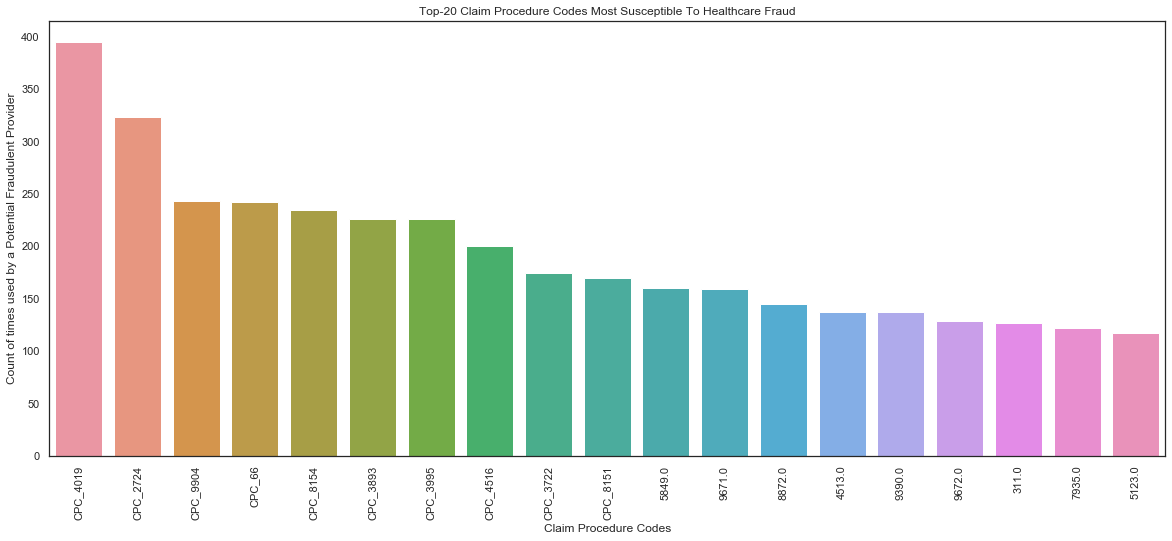

In [725]:

sns.set(rc={'figure.figsize':(20,8)},style='white')
CPC_F_Count = set3.sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'ClmProcedureCode',0: 'Count'}).head(20)
CPC_F_Count = CPC_F_Count[CPC_F_Count['ClmProcedureCode']!=0]
sns.barplot(x='ClmProcedureCode',y='Count', data=CPC_F_Count)
plt.title('Top-20 Claim Procedure Codes Most Susceptible To Healthcare Fraud')
plt.xlabel('Claim Procedure Codes')
plt.ylabel('Count of times used by a Potential Fraudulent Provider')
plt.xticks(rotation=90)

## CPC NFraud Top 10 Graph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

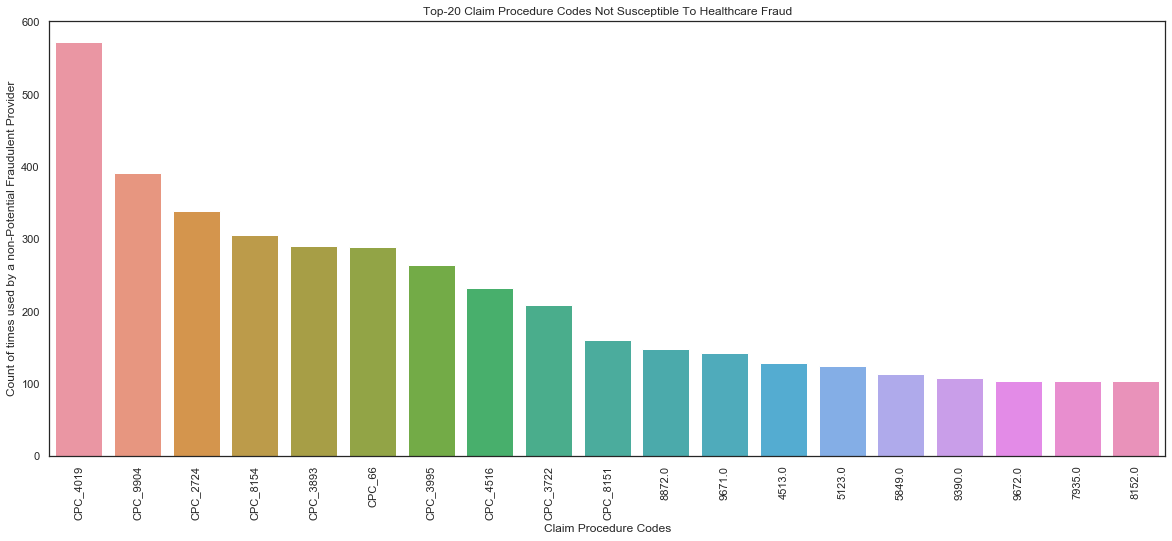

In [721]:
CPC_NF_Count = CM_Set3.sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'ClmProcedureCode',0: 'Count'}).head(20)
CPC_NF_Count = CPC_NF_Count[CPC_NF_Count['ClmProcedureCode']!=0]
sns.barplot(x='ClmProcedureCode',y='Count', data=CPC_NF_Count)
plt.title('Top-20 Claim Procedure Codes Not Susceptible To Healthcare Fraud')
plt.xlabel('Claim Procedure Codes')
plt.ylabel('Count of times used by a non-Potential Fraudulent Provider')
plt.xticks(rotation=90)

## CDC Fraud Top 10 Graph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

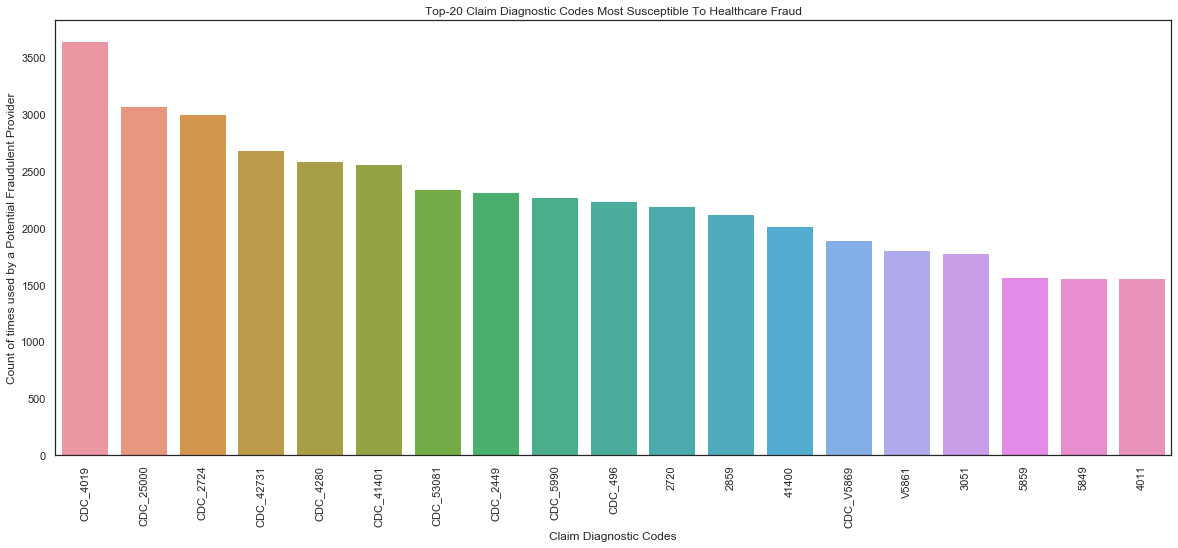

In [722]:
CDC_F_Count = CM_Set_1.sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'ClmDiagnosticCode',0: 'Count'}).head(20)
CDC_F_Count = CDC_F_Count[CDC_F_Count['ClmDiagnosticCode']!=0]
sns.barplot(x='ClmDiagnosticCode',y='Count', data=CDC_F_Count)
plt.title('Top-20 Claim Diagnostic Codes Most Susceptible To Healthcare Fraud')
plt.xlabel('Claim Diagnostic Codes')
plt.ylabel('Count of times used by a Potential Fraudulent Provider')
plt.xticks(rotation=90)

## CDC NFraud Top 10 Graph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

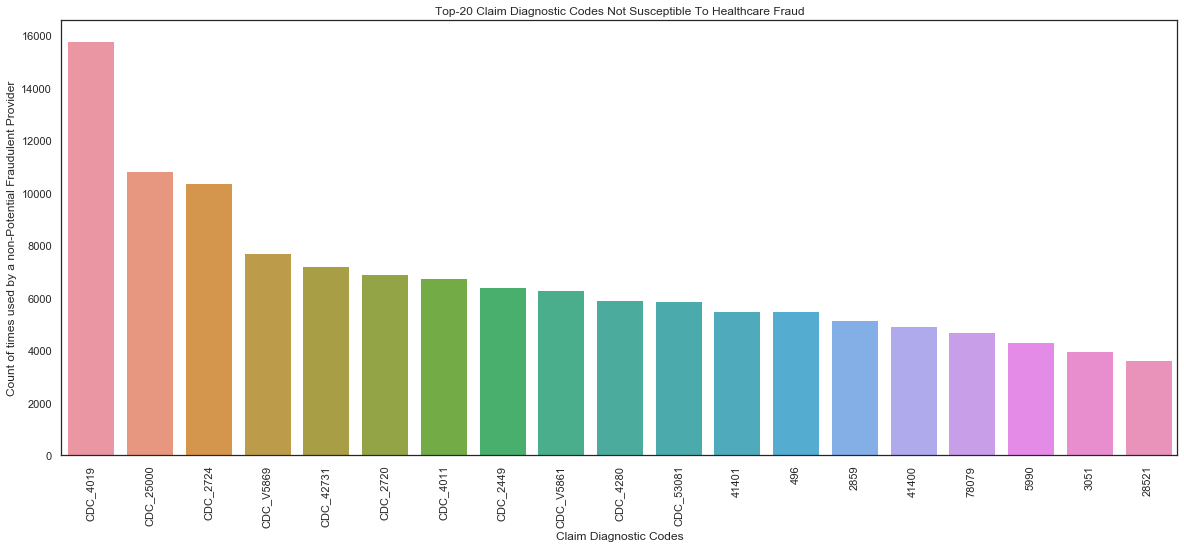

In [723]:
CDC_NF_Count = CM_Set_4.sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'ClmDiagnosticCode',0: 'Count'}).head(20)
CDC_NF_Count = CDC_NF_Count[CDC_NF_Count['ClmDiagnosticCode']!=0]
sns.barplot(x='ClmDiagnosticCode',y='Count', data=CDC_NF_Count)
plt.title('Top-20 Claim Diagnostic Codes Not Susceptible To Healthcare Fraud')
plt.xlabel('Claim Diagnostic Codes')
plt.ylabel('Count of times used by a non-Potential Fraudulent Provider')
plt.xticks(rotation=90)

## DGC Fraud Top 10 Graph

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

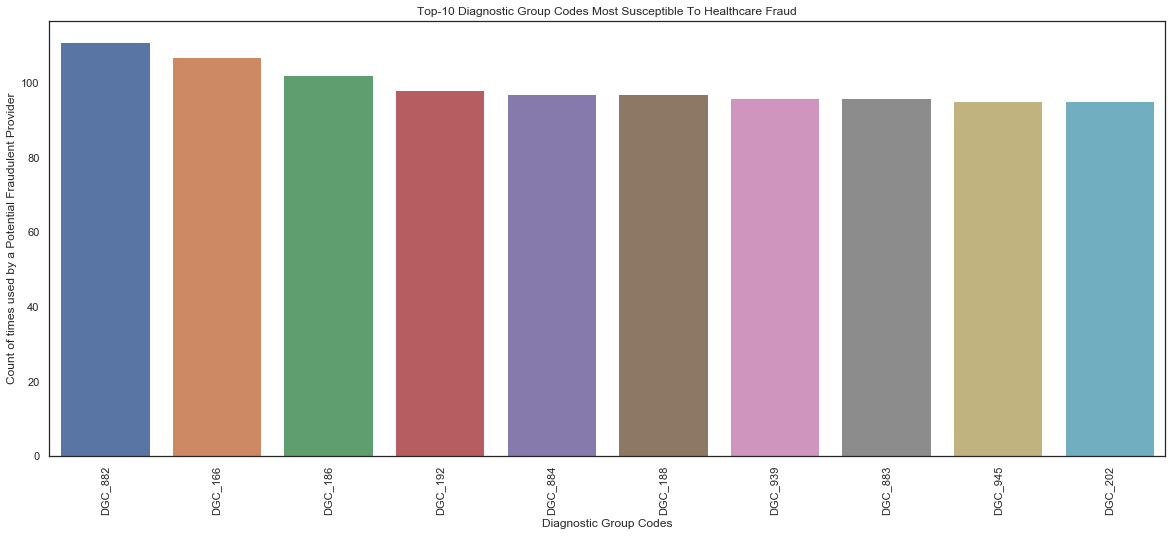

In [717]:
DGC_F_Count = DGC_Fraud1.sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'DiagnosticGroupCode',0: 'Count'}).head(10)
sns.barplot(x='DiagnosisGroupCode',y='Count', data=DGC_F_Count)
plt.title('Top-10 Diagnostic Group Codes Most Susceptible To Healthcare Fraud')
plt.xlabel('Diagnostic Group Codes')
plt.ylabel('Count of times used by a Potential Fraudulent Provider')
plt.xticks(rotation=90)

## DGC NFraud Top 10 Graph

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

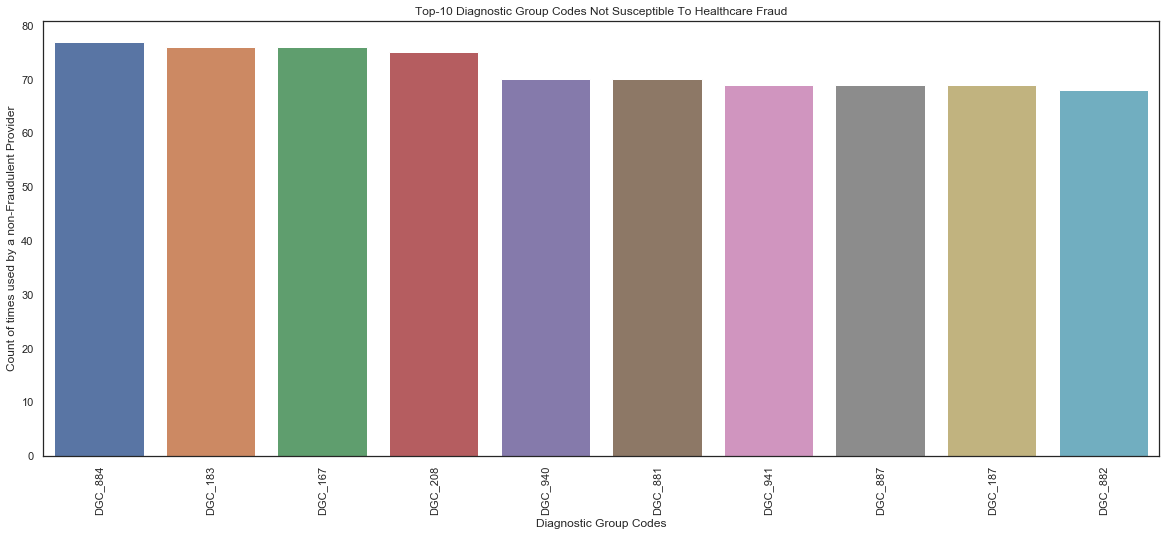

In [716]:
DGC_NF_Count= DGC_NFraud1.sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'DiagnosticGroupCode',0: 'Count'}).head(10)
sns.barplot(x='DiagnosisGroupCode',y='Count', data=DGC_NF_Count)
plt.title('Top-10 Diagnostic Group Codes Not Susceptible To Healthcare Fraud')
plt.xlabel('Diagnostic Group Codes')
plt.ylabel('Count of times used by a non-Fraudulent Provider')
plt.xticks(rotation=90)